In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import field
import spatial
import timesteppers
import equations
from equations2 import SWFull
import equations3
import equations4

In [2]:
def plot_2D_field(xm, ym, data):
    fig = plt.figure(figsize=(4,3))
    ax = fig.add_subplot(111)
    pcm = ax.pcolormesh(xm, ym, data)
    ax.set_aspect(1)
    fig.colorbar(pcm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

/home/carter-koehler/.local/lib/python3.6/site-packages/scipy/sparse/_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


<IPython.core.display.Javascript object>


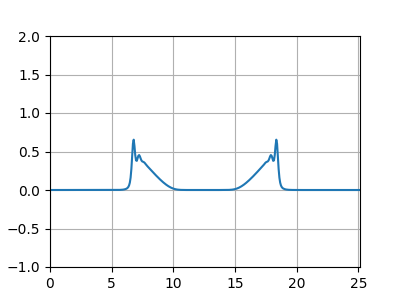

In [7]:
resolution=400
end_point = 8*np.pi
grid_x = field.UniformPeriodicGrid(resolution, end_point)
domain = field.Domain([grid_x])
x, = domain.values()

BT = 2#np.sin(x) + 1.5
IC = np.exp( -(x-4*np.pi)**2 )

h = field.Field(domain)
u = field.Field(domain)
H = field.Field(domain)

X = field.FieldSystem([u,h])
h.data[:] = IC
u.data[:] = 0*IC
H.data[:] = BT

g = 9.81
f = 0.5
b = 0

alpha = 0.005

sw_problem = equations4.SWFull1D(X, 2, g=g, f=f, b=b, H=H)
dt = alpha*grid_x.dx


output_cadence = 10
fig = plt.figure(figsize=(4,3))
p, = plt.plot(x, h.data)
plt.grid()
plt.xlim([0, end_point])
plt.ylim([-1,2])
fig.canvas.draw()
while sw_problem.t < 1 - 1e-5:
    sw_problem.step(dt)
    if sw_problem.iter % output_cadence == 0:
        p.set_ydata(h.data)
        fig.canvas.draw()
#         print(sw_problem.t)

# plt.plot(x, IC)

/home/carter-koehler/.local/lib/python3.6/site-packages/scipy/sparse/_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


<IPython.core.display.Javascript object>


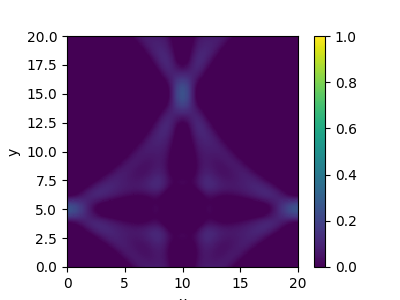

0.9067002709541584
0.6599807682045161
0.36508730817457796
0.27608710434411543
0.24858928456187537
0.23245978099227477
0.21965034758906324
0.2088897600624636
0.19971846113429825
0.191611254197201
0.18431439965505533
0.17772247710691835
0.1717588357621029
0.16639574062250315
0.16166894877701107
0.15725521482779953
0.1531509564561
0.14929533448183385
0.14567597037158092
0.14229813396383345
0.13912969973200895
0.13631604294195346
0.1336307480558407
0.1310738671864942
0.1286173121333368
0.12626072033913643
0.12401259305498337
0.12187163791512626
0.11985169210069527
0.11802162681401729
0.11625458415500413
0.11453139124284357
0.11285748267824841
0.11122576704421336
0.10965425187392137
0.10814187803894405
0.10669139781170124
0.10538902578663394
0.10410949787322202
0.10539705089044152
0.12402314957141006
0.15830483844602825
0.18288050578565432
0.18898497545465195
0.18790735800986746
0.18681495841246804
0.18559686383441032
0.18432403077296441
0.18309615714654032
0.1817015169288763
0.180509921832

In [3]:
resolution=200
grid_x = field.UniformPeriodicGrid(resolution, 20)
grid_y = field.UniformPeriodicGrid(resolution, 20)
domain = field.Domain((grid_x, grid_y))
x, y = domain.values()

# BT = np.sin(x/2)*np.sin(y/2) + 1.5
# BT = (0.1*x + 1) * (0.1*y + 1)
BT = 2

# IC = np.exp( - ( (x-np.pi)**2 + (y-np.pi)**2 ) )
IC = np.exp( - ( (x-10)**2 + (y-5)**2 ) )
# IC += np.exp( - ( (x-15)**2 + (y-15)**2 ) )
# IC += np.exp( - ( (x-10)**2 + (y-18)**2 ) )
# IC += np.exp( - ( (x-2)**2 + (y-7)**2 ) )
#IC += np.exp( - ( (x-10)**2 + (y-10)**2 ) )
#IC += np.exp( - ( (x-10)**2 + (y-15)**2 ) )


h = field.Field(domain)
u = field.Field(domain)
v = field.Field(domain)
H = field.Field(domain)

X = field.FieldSystem([u,v,h])

h.data[:] = IC
u.data[:] = 0*IC 
v.data[:] = 0*IC
H.data[:] = BT

g = 9.81
nu = 0
f = 0
b = 0

alpha = 0.05

sw = equations3.linearSW(X, 2, g, f,b,H)
sw_problem=timesteppers.PredictorCorrector(sw)
dt = alpha*grid_x.dx

xm, ym = domain.plotting_arrays()

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
pcm = ax.pcolormesh(xm, ym, h.data)
ax.set_aspect(1)
fig.colorbar(pcm)
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.canvas.draw()
while sw_problem.t < 5 - 1e-5:
    sw_problem.step(dt)
    if sw_problem.iter % 10 == 0:
        pcm.set_array(np.ravel(h.data))
        #pcm.set_clim([0,np.max(h.data)])
        print(np.max(h.data))
        fig.canvas.draw()
print('done')

<IPython.core.display.Javascript object>


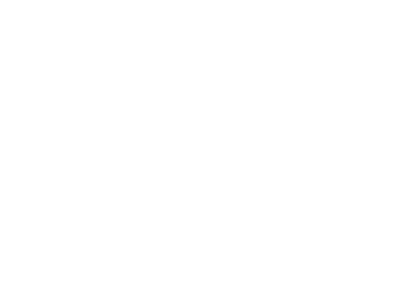

0.9998955933858213
0.9994198509373302
0.9985736311142462
0.9979680913508151
0.9990315940045577
0.9997239302976381
1.000044693046179
0.9999945942624812
0.9995754439727527
0.9987901172114653
0.9976425103881678
0.99792215656304
0.9986712777200517
0.9990529764970669
0.9990698102349191
0.9987252935256654
0.9980238420959049
0.9969707116579298
0.9957947069218469
0.996617391148198
0.9970813782367082
0.9971905148816325
0.9969494254850518
0.9963634520924792
0.9954385932146955
0.9941814423588683
0.9936409785812942
0.9942158858747122
0.9944479695074036
0.9943424259236476
0.9939050128623967
0.9931419955449703
0.9920600941238956
0.9906664325127719
0.9905468221998478
0.9909321155942138
0.9909925384612565
0.9907339168647669


KeyboardInterrupt: 

In [10]:
resolution=200
grid_x = field.UniformPeriodicGrid(resolution, 20)
grid_y = field.UniformPeriodicGrid(resolution, 20)
domain = field.Domain((grid_x, grid_y))
x, y = domain.values()

# BT = np.sin(x/2)*np.sin(y/2) + 3
BT = (0.1*x + 1) * (0.1*y + 1)

# IC = np.exp( - ( (x-np.pi)**2 + (y-np.pi)**2 ) )
IC = np.exp( - ( (x-10)**2 + (y-5)**2 ) )
# IC += np.exp( - ( (x-15)**2 + (y-15)**2 ) )
# IC += np.exp( - ( (x-10)**2 + (y-18)**2 ) )
# IC += np.exp( - ( (x-2)**2 + (y-7)**2 ) )
#IC += np.exp( - ( (x-10)**2 + (y-10)**2 ) )
#IC += np.exp( - ( (x-10)**2 + (y-15)**2 ) )


h = field.Field(domain)
u = field.Field(domain)
v = field.Field(domain)
H = field.Field(domain)

X = field.FieldSystem([u,v,h])

h.data[:] = IC
u.data[:] = 0*IC 
v.data[:] = 0*IC
H.data[:] = BT

g = 9.81
nu = 0
f = 0.5
b = 0.5

alpha = 0.05

sw = equations3.linearSW2(X, 2, g, f,b,H)
sw_problem=timesteppers.PredictorCorrector(sw)
dt = alpha*grid_x.dx

xm, ym = domain.plotting_arrays()

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
pcm = ax.pcolormesh(xm, ym, h.data)
ax.set_aspect(1)
fig.colorbar(pcm)
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.canvas.draw()
while sw_problem.t < 5 - 1e-5:
    sw_problem.step(dt)
    if sw_problem.iter % 10 == 0:
        pcm.set_array(np.ravel(h.data))
        #pcm.set_clim([0,np.max(h.data)])
        print(np.max(h.data))
        fig.canvas.draw()
print('done')

/home/carter-koehler/.local/lib/python3.6/site-packages/scipy/sparse/_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


<IPython.core.display.Javascript object>


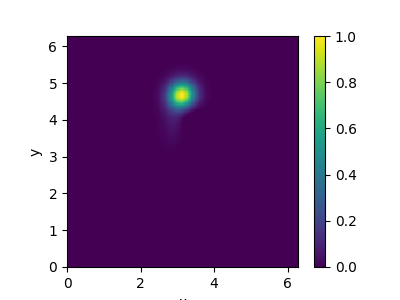

0.9999233022063874
0.9995861435897408
0.9989807768313287
0.9980919768175567
0.9988228533270762
0.9992598257457211
0.9993669888000316
1.0002870338950594
1.00100842972687
1.0013797015814383


KeyboardInterrupt: 

In [3]:
resolution=200
grid_x = field.UniformPeriodicGrid(resolution, 2*np.pi)
grid_y = field.UniformPeriodicGrid(resolution, 2*np.pi)
domain = field.Domain((grid_x, grid_y))
x, y = domain.values()

BT = np.sin(x/2)*np.ones_like(y)
BT = np.sin(x/2)*np.sin(y/2)

IC = np.exp( - ( (x-np.pi)**2 + (y-np.pi)**2 )*8 )
IC += np.exp( - ( (x-15)**2 + (y-15)**2 ) )

# IC += np.exp( - ( (x-10)**2 + (y-18)**2 ) )
# IC += np.exp( - ( (x-2)**2 + (y-7)**2 ) )
#IC += np.exp( - ( (x-10)**2 + (y-10)**2 ) )
#IC += np.exp( - ( (x-10)**2 + (y-15)**2 ) )


h = field.Field(domain)
u = field.Field(domain)
v = field.Field(domain)
H = field.Field(domain)

X = field.FieldSystem([u,v,h])

h.data[:] = IC
u.data[:] = 0*IC 
v.data[:] = 0*IC
H.data[:] = BT

g = 9.81
nu = 0
f = 0.5
b = 0.5

alpha = 0.05

sw = equations3.linearSW2(X, 2, g, f,b,H)
sw_problem=timesteppers.PredictorCorrector(sw)
dt = alpha*grid_x.dx

xm, ym = domain.plotting_arrays()

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
pcm = ax.pcolormesh(xm, ym, H.data)
ax.set_aspect(1)
fig.colorbar(pcm)
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.canvas.draw()
while sw_problem.t < 5 - 1e-5:
    sw_problem.step(dt)
    if sw_problem.iter % 10 == 0:
        pcm.set_array(np.ravel(h.data))
        #pcm.set_clim([0,np.max(h.data)])
        print(np.max(h.data))
        fig.canvas.draw()
print('done')

<IPython.core.display.Javascript object>


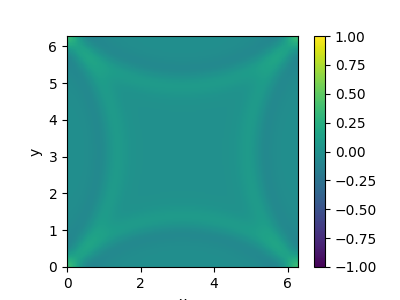

0.8548812516631791
0.49900478828819755
0.2882995088568334
0.24928100283701488
0.23013076029624752
0.21539512989778203
0.20357360941030087
0.1932826090325242
0.18487315344207852
0.1772898442446077
0.1707540640172704
0.16503191231991116
0.15973947403883096
0.15508749450997833
0.15096609342917686
0.1470780544149669
0.14350399284197557
0.14031447785176743
0.13740280518817424
0.13463584050201555
0.1320337549124121
0.12961221943147924
0.12734686526530223
0.12522138439735164
0.12324440152652785
0.12138279344389635
0.11960391206815635
0.11790223817893017
0.11822900575381433
0.13281172944493358
0.1811131412545405
0.21566457844826767
0.21852275712581823
0.21641562925195068
0.21420622389165286
0.21199410514635383
0.20961219676736986
0.20740996125811997
0.20505707228717038
0.2028004242221488
0.20040445821978461
0.1983995446436783
0.19623531332868033
0.19829426269446665
0.2285212728322887
0.3162372556623043
0.3705080061506347
0.3527803677450366
0.2509019592086314


In [ ]:
resolution=200
grid_x = field.UniformPeriodicGrid(resolution, 2*np.pi)
grid_y = field.UniformPeriodicGrid(resolution, 2*np.pi)
domain = field.Domain((grid_x, grid_y))
x, y = domain.values()

#BT = np.sin(x/2)*np.ones_like(y)
BT = np.sin(x/2)*np.sin(y/2)+3

IC = np.exp( - ( (x-np.pi)**2 + (y-np.pi)**2 )*8 )


# IC += np.exp( - ( (x-10)**2 + (y-18)**2 ) )
# IC += np.exp( - ( (x-2)**2 + (y-7)**2 ) )
#IC += np.exp( - ( (x-10)**2 + (y-10)**2 ) )
#IC += np.exp( - ( (x-10)**2 + (y-15)**2 ) )


h = field.Field(domain)
u = field.Field(domain)
v = field.Field(domain)
H = field.Field(domain)

X = field.FieldSystem([u,v,h])

h.data[:] = IC
u.data[:] = 0*IC 
v.data[:] = 0*IC
H.data[:] = BT

g = 9.81
nu = 0
f = 0
b = 0

# nu = 0.1
# f = 0.5
# b = 0.5

alpha = 0.05

sw = equations4.SWFull(X, 2, g, f,b,nu,H)
dt = alpha*grid_x.dx

xm, ym = domain.plotting_arrays()

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
pcm = ax.pcolormesh(xm, ym, h.data)
pcm.set_clim([-1,1])
ax.set_aspect(1)
fig.colorbar(pcm)
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.canvas.draw()
while sw.t < 2 - 1e-5:
    sw.step(dt)
    if sw.iter % 10 == 0:
        pcm.set_array(np.ravel(h.data))
#         pcm.set_clim([0,np.max(h.data)])
        print(np.max(h.data))
        fig.canvas.draw()
print('done')